In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime
import numpy as np
import calendar
import matplotlib.colors as mcolors

df = pd.read_csv('data/all_weather_by_hour.csv', sep=',')

num_ticks = 6

In [11]:
def format_duration(duration):
    delta = datetime.timedelta(seconds=duration)
    days = delta.days
    hours, remainder = divmod(delta.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    parts = []
    if days:
        parts.append(f"{days} day{'s' if days != 1 else ''}")
    if hours:
        parts.append(f"{hours} hour{'s' if hours != 1 else ''}")
    if minutes:
        parts.append(f"{minutes} minute{'s' if minutes != 1 else ''}")
    if seconds:
        parts.append(f"{seconds} second{'s' if seconds != 1 else ''}")
    if not parts:
        parts.append("0 seconds")
    return ", ".join(parts)

def str_to_date(str):
    return datetime.datetime.strptime(str, "%Y-%m-%d %H:%M:%S")

def get_duration(prefix = ''):
    def duration(row):
        start = row['start']
        end = row[f'{prefix}end']
        if isinstance(start, str) and isinstance(end, str):
            dur = str_to_date(end) - str_to_date(start)
            return dur.total_seconds()
        return float('NaN')
    return duration

prefix = 'hour'
df = df.filter(regex=f'^(?!{prefix}).*')
df['day_datetime'] = pd.to_datetime(df['day_datetime'])
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190656 entries, 0 to 190655
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   city_latitude         190656 non-null  float64       
 1   city_longitude        190656 non-null  float64       
 2   city_resolvedAddress  190656 non-null  object        
 3   city_address          190656 non-null  object        
 4   city_timezone         190656 non-null  object        
 5   city_tzoffset         190656 non-null  float64       
 6   day_datetime          190656 non-null  datetime64[ns]
 7   day_datetimeEpoch     190656 non-null  int64         
 8   day_tempmax           190656 non-null  float64       
 9   day_tempmin           190656 non-null  float64       
 10  day_temp              190656 non-null  float64       
 11  day_feelslikemax      190656 non-null  float64       
 12  day_feelslikemin      190656 non-null  float64       
 13 

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,day_sunriseEpoch,day_sunset,day_sunsetEpoch,day_moonphase,day_conditions,day_description,day_icon,day_source,day_preciptype,day_stations
0,49.4407,32.0637,"Черкаси, Україна","Cherkasy,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,-0.1,...,1645677881,17:26:05,1645716365,0.77,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,obs,rain,remote
1,49.4407,32.0637,"Черкаси, Україна","Cherkasy,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,-0.1,...,1645677881,17:26:05,1645716365,0.77,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,obs,rain,remote
2,49.4407,32.0637,"Черкаси, Україна","Cherkasy,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,-0.1,...,1645677881,17:26:05,1645716365,0.77,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,obs,rain,remote
3,49.4407,32.0637,"Черкаси, Україна","Cherkasy,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,-0.1,...,1645677881,17:26:05,1645716365,0.77,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,obs,rain,remote
4,49.4407,32.0637,"Черкаси, Україна","Cherkasy,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,-0.1,...,1645677881,17:26:05,1645716365,0.77,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,obs,rain,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190651,49.2336,28.4486,"Вінниця, Україна","Vinnytsia,Ukraine",Europe/Kiev,2.0,2023-01-20,1674165600,11.2,5.7,...,1674193924,16:42:43,1674225763,0.93,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,obs,rain,33562099999;remote
190652,49.2336,28.4486,"Вінниця, Україна","Vinnytsia,Ukraine",Europe/Kiev,2.0,2023-01-20,1674165600,11.2,5.7,...,1674193924,16:42:43,1674225763,0.93,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,obs,rain,33562099999;remote
190653,49.2336,28.4486,"Вінниця, Україна","Vinnytsia,Ukraine",Europe/Kiev,2.0,2023-01-20,1674165600,11.2,5.7,...,1674193924,16:42:43,1674225763,0.93,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,obs,rain,33562099999;remote
190654,49.2336,28.4486,"Вінниця, Україна","Vinnytsia,Ukraine",Europe/Kiev,2.0,2023-01-20,1674165600,11.2,5.7,...,1674193924,16:42:43,1674225763,0.93,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,obs,rain,33562099999;remote


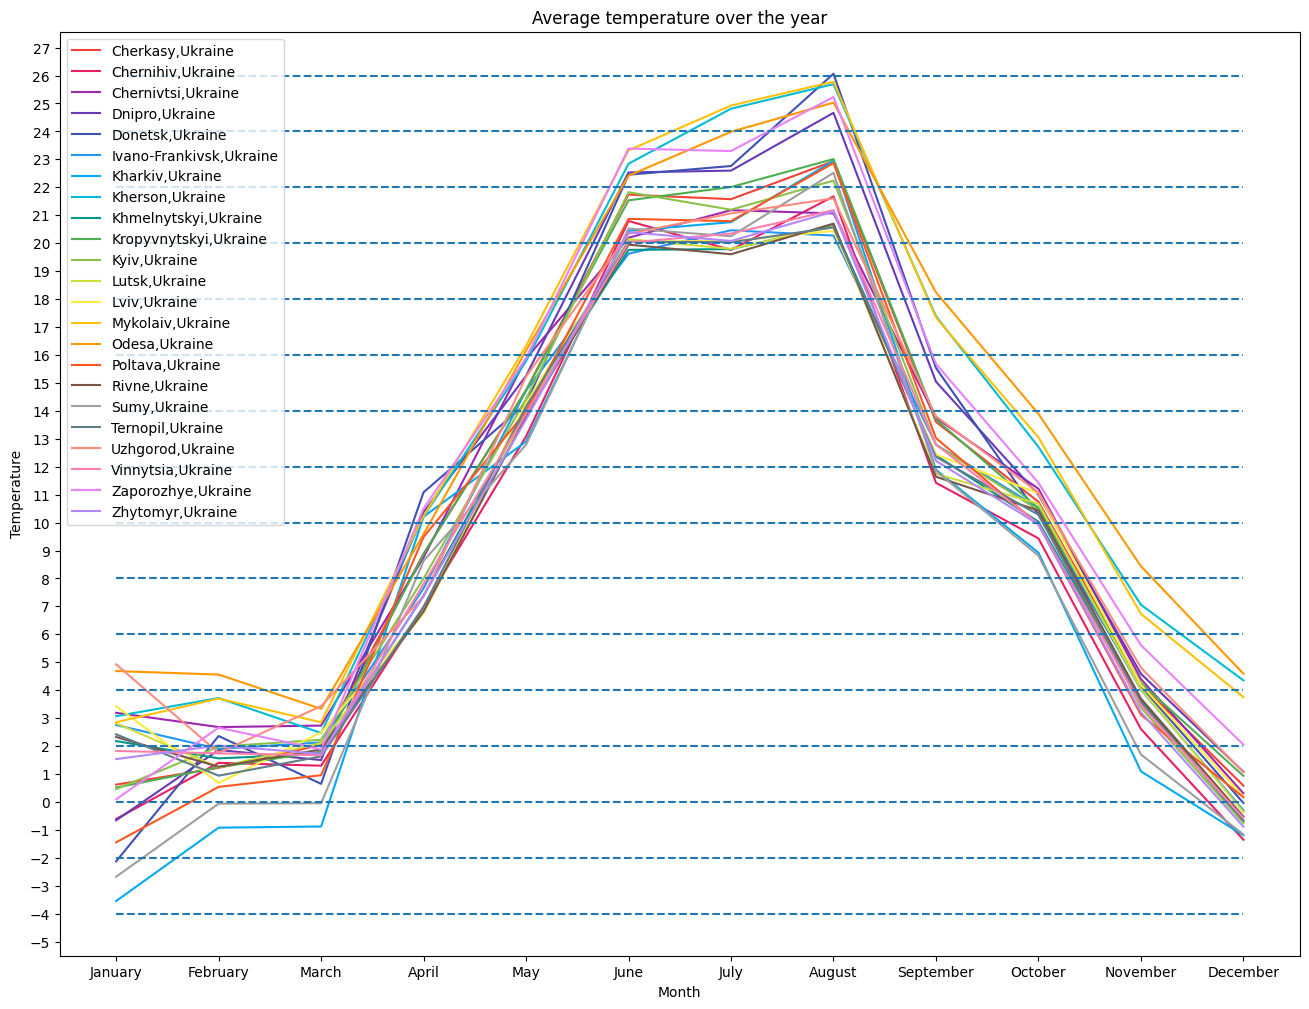

In [17]:
def mean_temp():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    grouped_data = df.groupby(['city_address', df['day_datetime'].dt.month])['day_temp'].mean()
    grouped_data = grouped_data.reset_index()
    cities = grouped_data['city_address'].unique()
    colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#795548', '#9E9E9E', '#607D8B', '#FF8A80', '#FF80AB', '#EA80FC', '#B388FF', '#82B1FF']

    ax.set_title('Average temperature over the year')
    i = 0
    for city in cities:
        city_data = grouped_data[grouped_data['city_address'] == city]
        plt.plot(city_data['day_datetime'], city_data['day_temp'], label=city, color=colors[i])
        i = i + 1

    month_names = [calendar.month_name[i] for i in range(1, 13)]
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    plt.xticks(x, month_names)


    y = range(-5, 30)
    plt.yticks(y)

    plt.hlines([-4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26], xmin=1, xmax=12, linestyles='dashed')

    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()



mean_temp()


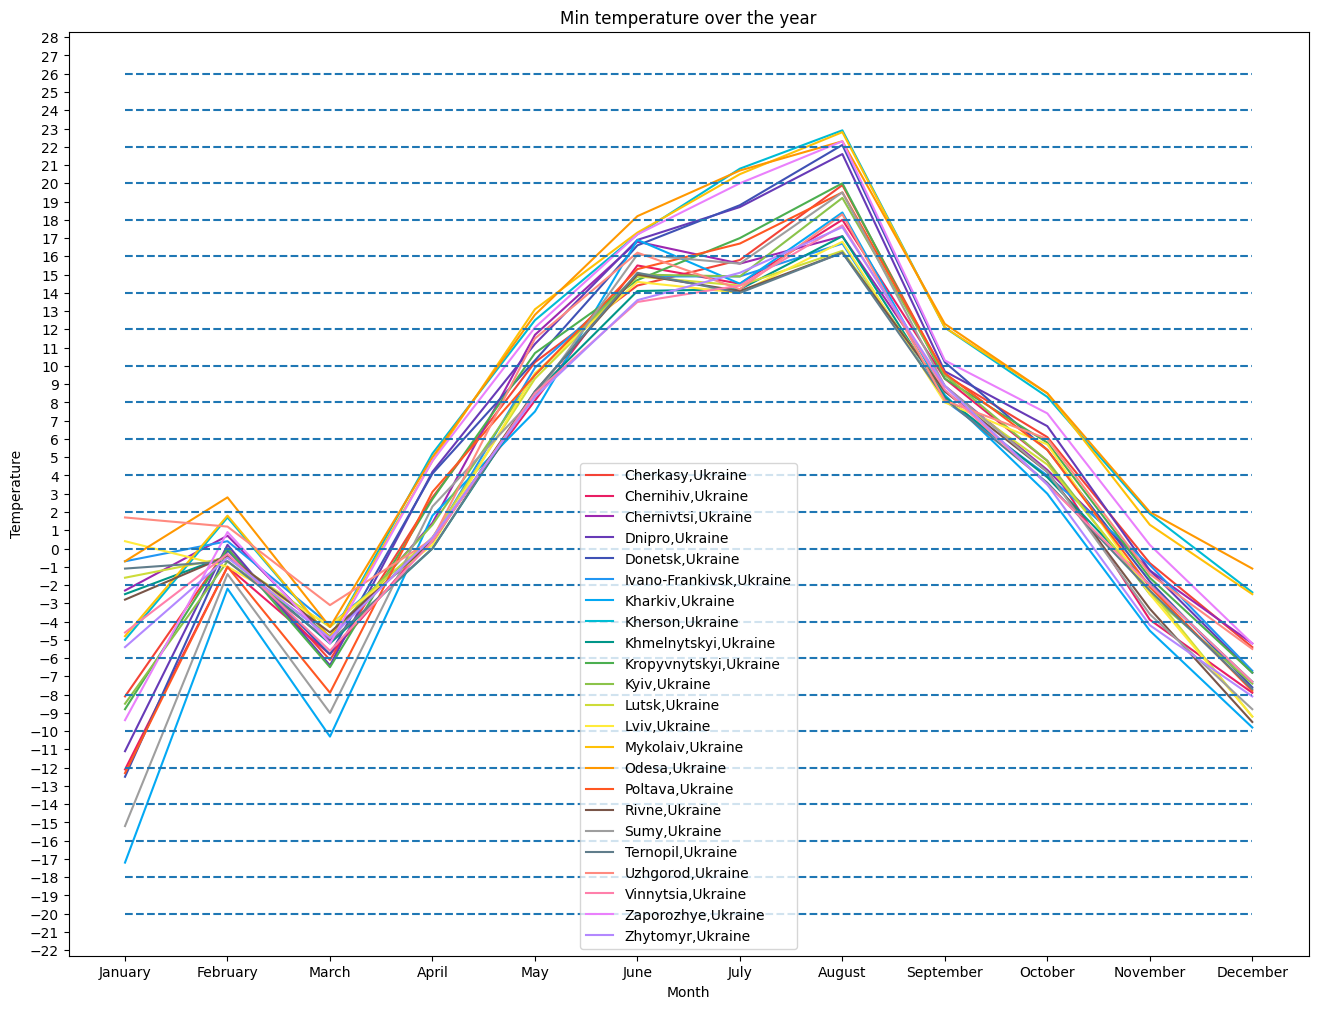

In [18]:

def min_temp():
    
    fig, ax = plt.subplots(figsize=(16, 12))
    grouped_data = df.groupby(['city_address', df['day_datetime'].dt.month])['day_temp'].min()
    grouped_data = grouped_data.reset_index()
    cities = grouped_data['city_address'].unique()
    colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#795548', '#9E9E9E', '#607D8B', '#FF8A80', '#FF80AB', '#EA80FC', '#B388FF', '#82B1FF']
    ax.set_title('Min temperature over the year')

    i = 0
    for city in cities:
        city_data = grouped_data[grouped_data['city_address'] == city]
        plt.plot(city_data['day_datetime'], city_data['day_temp'], label=city, color=colors[i])
        i = i + 1

    month_names = [calendar.month_name[i] for i in range(1, 13)]
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    plt.xticks(x, month_names)


    y = range(-30, 30)
    plt.yticks(y)

    plt.hlines([-20, -18, -16, -14, -12, -10, -8, - 6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26], xmin=1, xmax=12, linestyles='dashed')

    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()



min_temp()


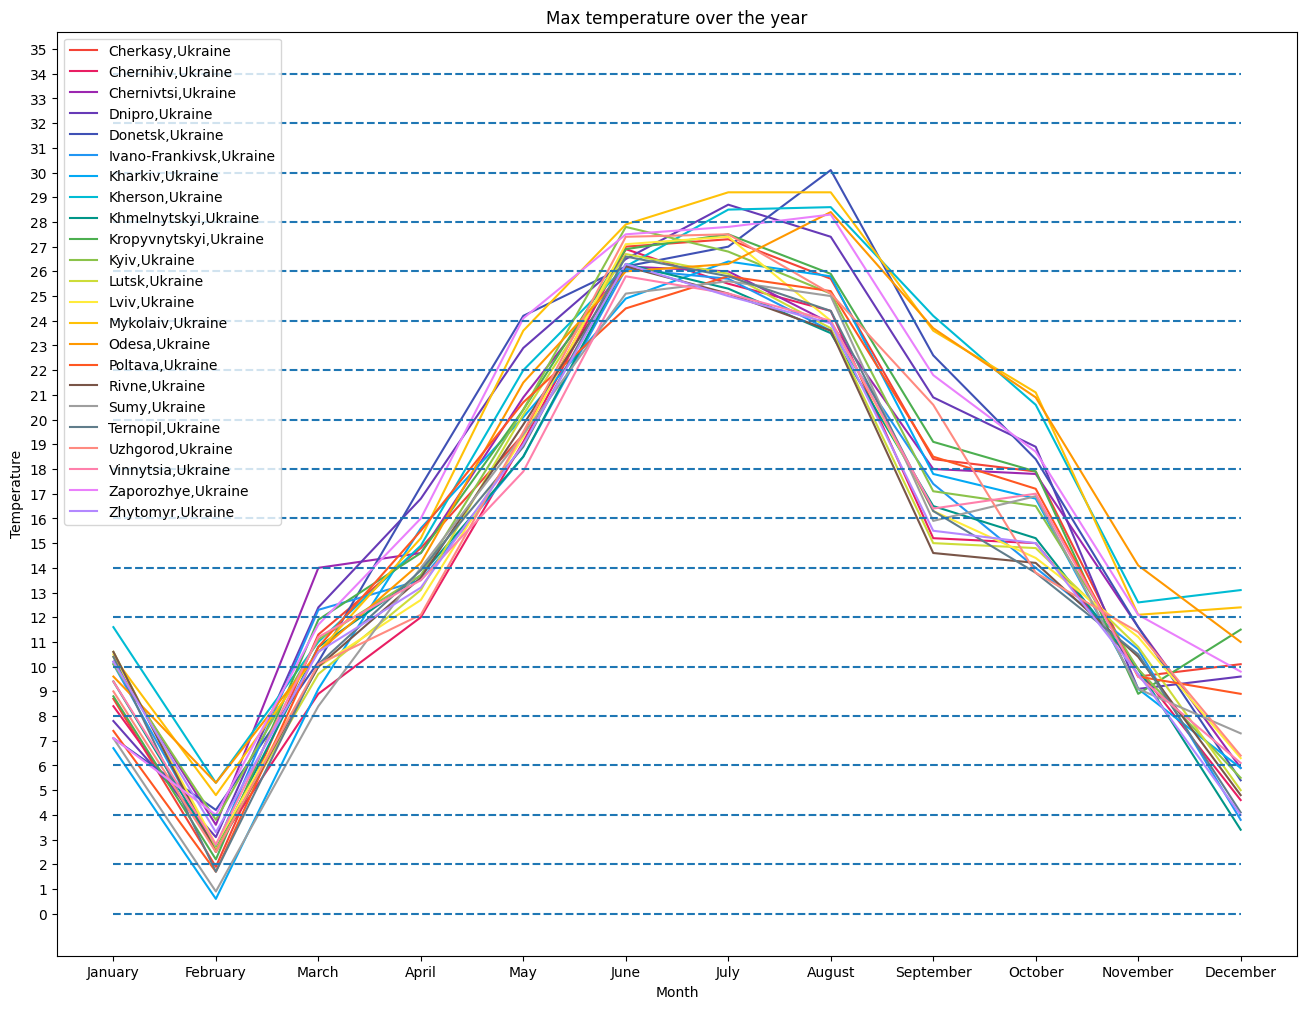

In [19]:

def max_temp():
    fig, ax = plt.subplots(figsize=(16, 12))
    grouped_data = df.groupby(['city_address', df['day_datetime'].dt.month])['day_temp'].max()
    grouped_data = grouped_data.reset_index()
    cities = grouped_data['city_address'].unique()
    ax.set_title('Max temperature over the year')
    colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#795548', '#9E9E9E', '#607D8B', '#FF8A80', '#FF80AB', '#EA80FC', '#B388FF', '#82B1FF']

    i = 0
    for city in cities:
        city_data = grouped_data[grouped_data['city_address'] == city]
        plt.plot(city_data['day_datetime'], city_data['day_temp'], label=city, color=colors[i])
        i = i + 1

    month_names = [calendar.month_name[i] for i in range(1, 13)]
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    plt.xticks(x, month_names)


    y = range(0, 40)
    plt.yticks(y)

    plt.hlines([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34], xmin=1, xmax=12, linestyles='dashed')

    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()



max_temp()


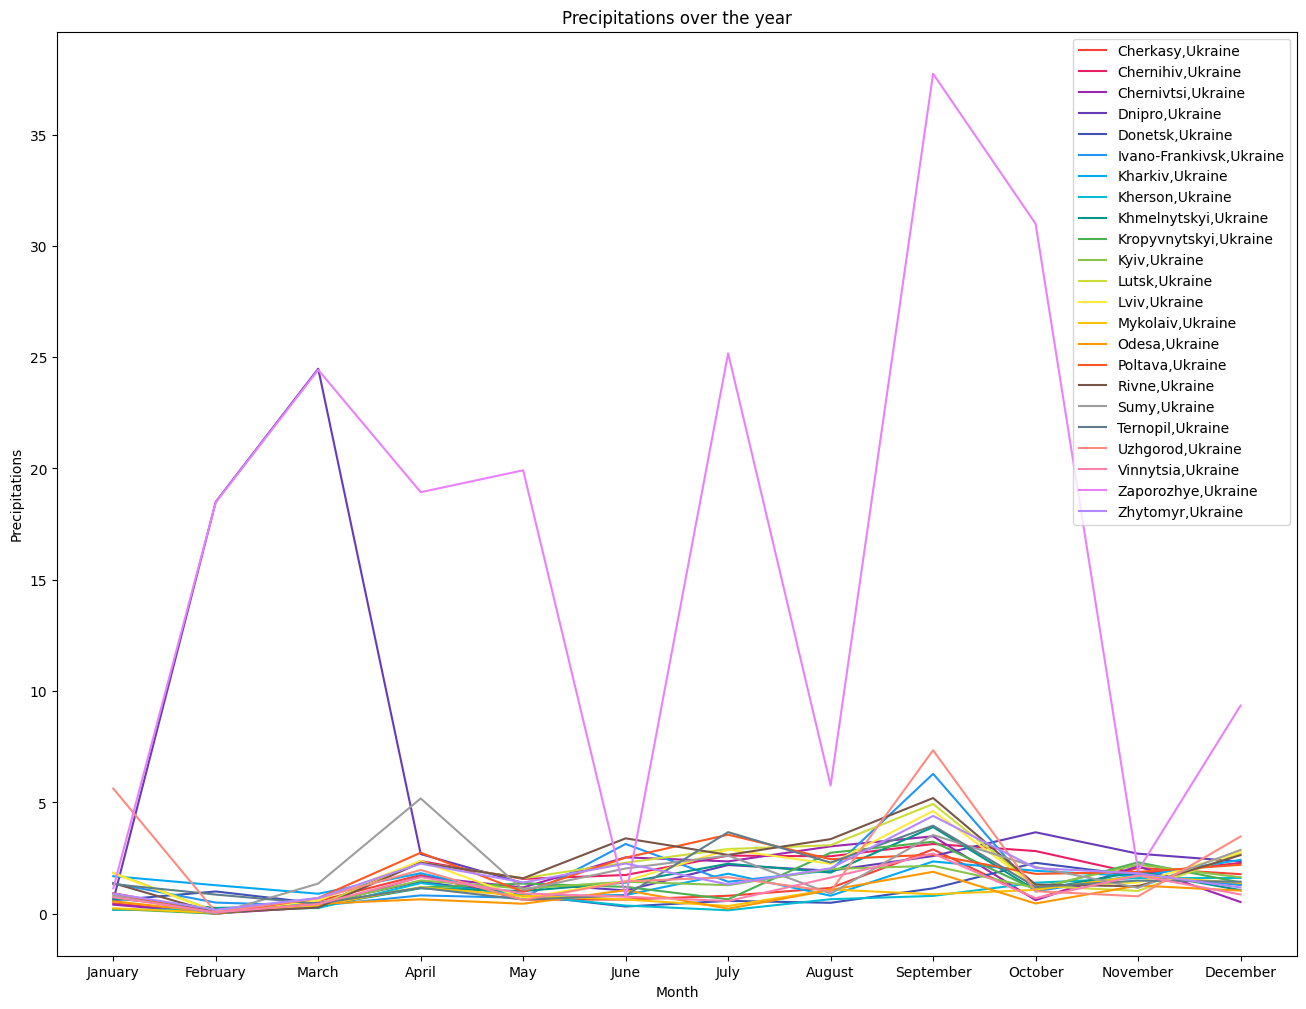

In [23]:

def mean_temp():
    fig, ax = plt.subplots(figsize=(16, 12))
    grouped_data = df.groupby(['city_address', df['day_datetime'].dt.month])['day_precip'].mean()
    grouped_data = grouped_data.reset_index()
    cities = grouped_data['city_address'].unique()
    colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#795548', '#9E9E9E', '#607D8B', '#FF8A80', '#FF80AB', '#EA80FC', '#B388FF', '#82B1FF']

    i = 0
    for city in cities:
        city_data = grouped_data[grouped_data['city_address'] == city]
        plt.plot(city_data['day_datetime'], city_data['day_precip'], label=city, color=colors[i])
        i = i + 1

    month_names = [calendar.month_name[i] for i in range(1, 13)]
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    plt.xticks(x, month_names)

    ax.set_title('Precipitations over the year')
    plt.xlabel('Month')
    plt.ylabel('Precipitations')
    plt.legend()
    plt.show()



mean_temp()


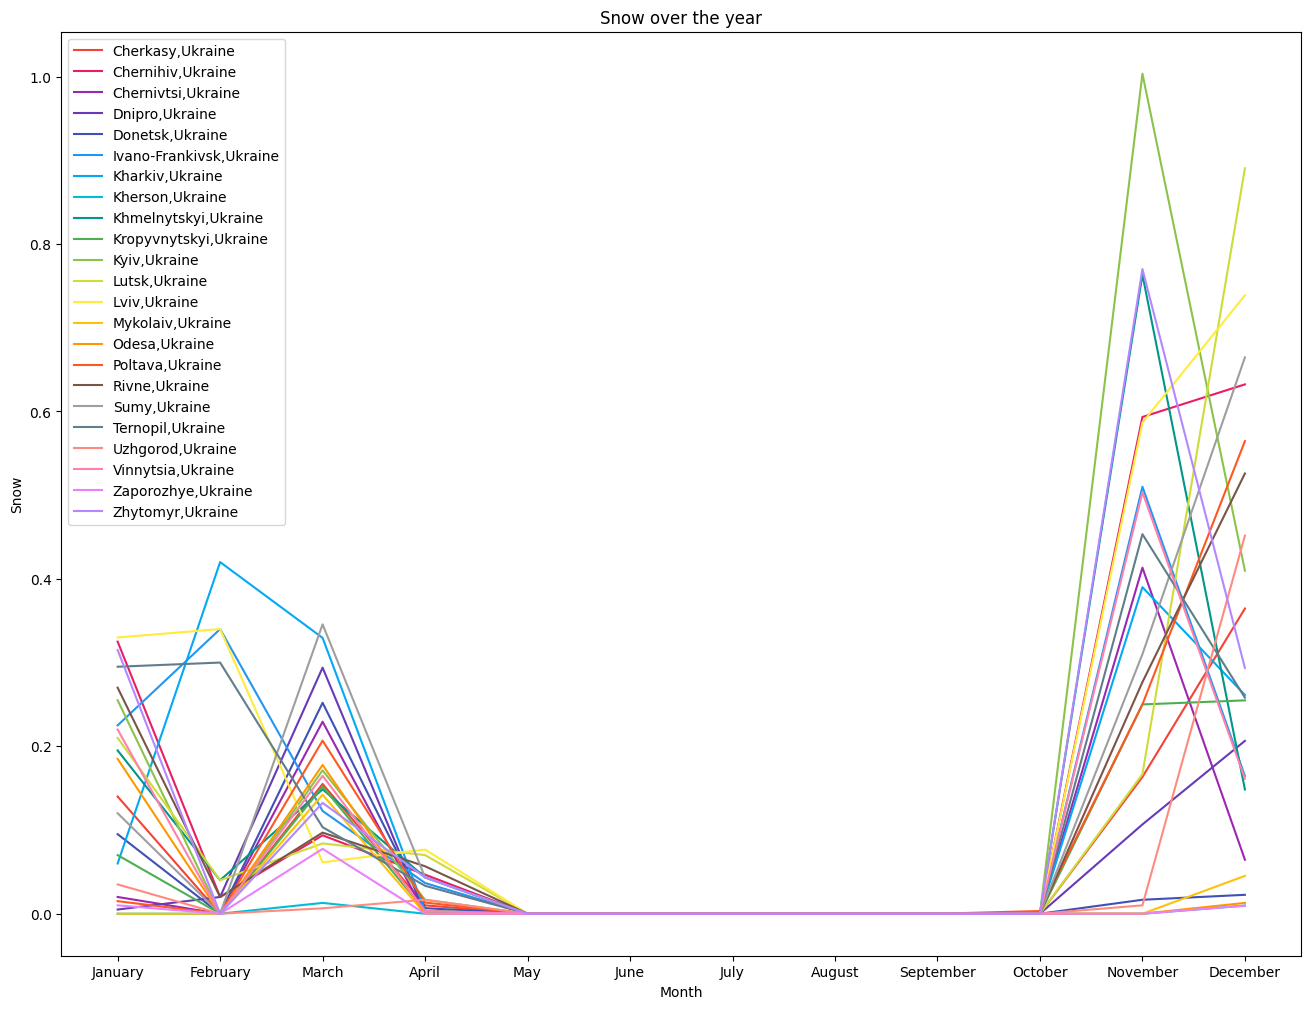

In [24]:

def snow():
    fig, ax = plt.subplots(figsize=(16, 12))
    grouped_data = df.groupby(['city_address', df['day_datetime'].dt.month])['day_snow'].mean()
    grouped_data = grouped_data.reset_index()
    cities = grouped_data['city_address'].unique()
    colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#795548', '#9E9E9E', '#607D8B', '#FF8A80', '#FF80AB', '#EA80FC', '#B388FF', '#82B1FF']

    i = 0
    for city in cities:
        city_data = grouped_data[grouped_data['city_address'] == city]
        plt.plot(city_data['day_datetime'], city_data['day_snow'], label=city, color=colors[i])
        i = i + 1

    month_names = [calendar.month_name[i] for i in range(1, 13)]
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    ax.set_title('Snow over the year')
    plt.xticks(x, month_names)
    plt.xlabel('Month')
    plt.ylabel('Snow')
    plt.legend()
    plt.show()



snow()


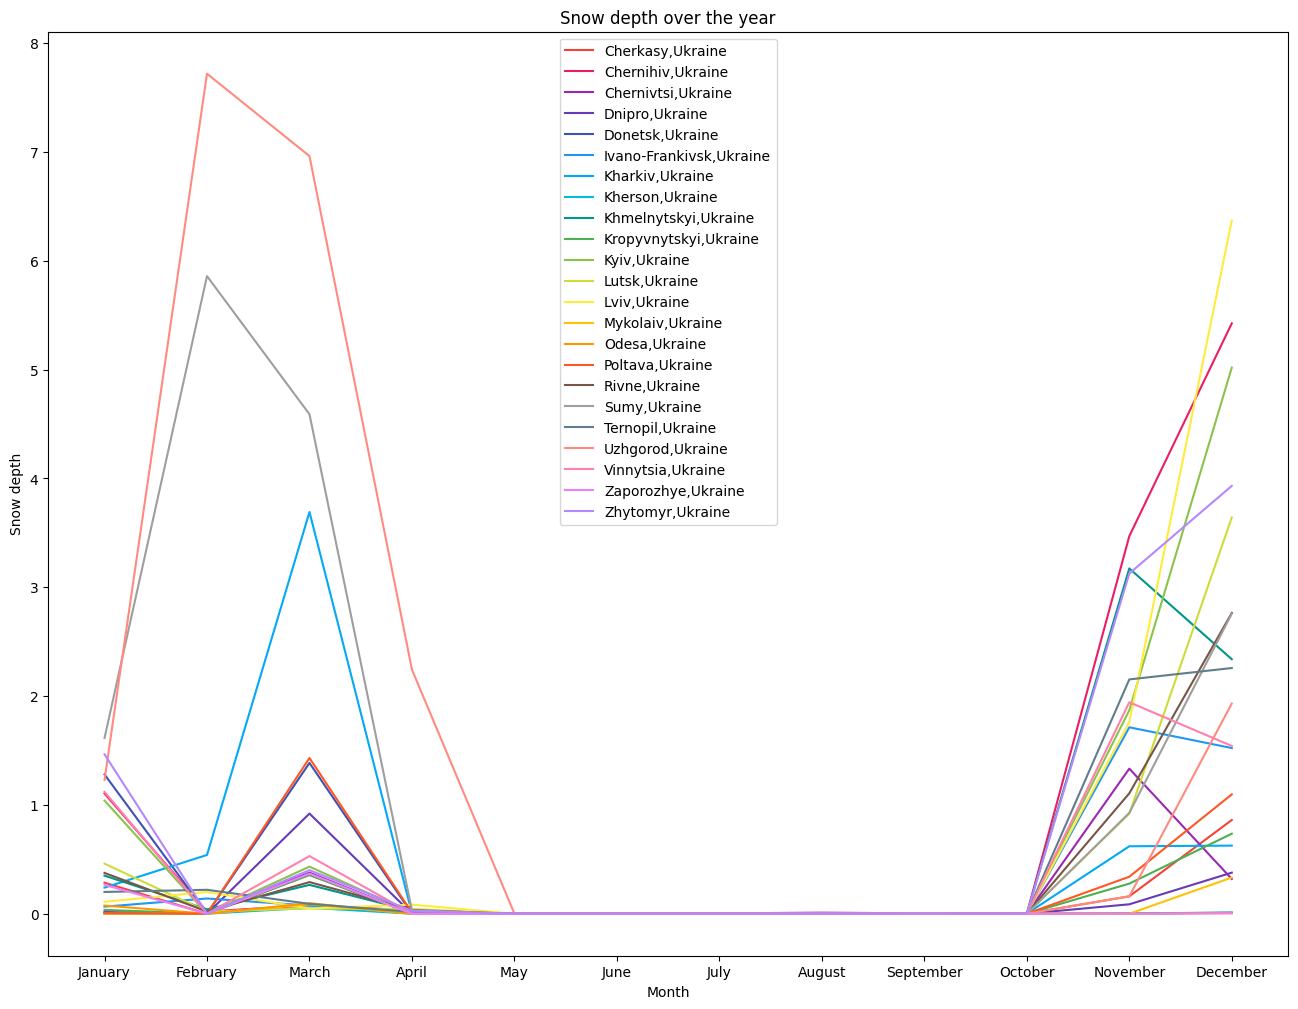

In [25]:

def snow2():
    fig, ax = plt.subplots(figsize=(16, 12))
    grouped_data = df.groupby(['city_address', df['day_datetime'].dt.month])['day_snowdepth'].mean()
    grouped_data = grouped_data.reset_index()
    cities = grouped_data['city_address'].unique()
    colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722', '#795548', '#9E9E9E', '#607D8B', '#FF8A80', '#FF80AB', '#EA80FC', '#B388FF', '#82B1FF']

    i = 0
    for city in cities:
        city_data = grouped_data[grouped_data['city_address'] == city]
        plt.plot(city_data['day_datetime'], city_data['day_snowdepth'], label=city, color=colors[i])
        i = i + 1

    month_names = [calendar.month_name[i] for i in range(1, 13)]
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    plt.xticks(x, month_names)
    ax.set_title('Snow depth over the year')
    plt.xlabel('Month')
    plt.ylabel('Snow depth')
    plt.legend()
    plt.show()



snow2()
